In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso


In [46]:
dataset = pd.read_csv('/content/car_details.csv')

In [47]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [48]:
dataset.shape

(4340, 8)

In [49]:
dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [50]:
print(dataset['fuel'].value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


In [51]:
print(dataset['seller_type'].value_counts())

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


In [52]:
print(dataset['transmission'].value_counts())

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


**Label Encoding**

In [53]:
print(dataset['owner'].value_counts())

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [54]:
dataset.replace({ 'fuel' : { 'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3, 'Electric':4 },
                   'seller_type': {'Individual' : 0, 'Dealer':1, 'Trustmark Dealer':2 },
                   'transmission': { 'Manual':0, 'Automatic':1 },
                   'owner': { 'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4 }
                  }, inplace= True)

In [55]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


In [56]:
X = dataset.drop(['name','selling_price'],axis=1)
Y = dataset['selling_price']

In [57]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]


In [58]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [60]:
print(X.shape,X_train.shape,X_test.shape)

(4340, 6) (3906, 6) (434, 6)


In [61]:
lin_reg_model = LinearRegression()

In [62]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [63]:
training_data_prediction = lin_reg_model.predict(X_train)

In [64]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print(" R squared error for linear reg",error_score)

 R squared error for linear reg 0.4430787587921934


In [65]:
test_data_prediction = lin_reg_model.predict(X_test)

In [66]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(" R squared error fro linear",error_score)

 R squared error fro linear 0.5212912933220211


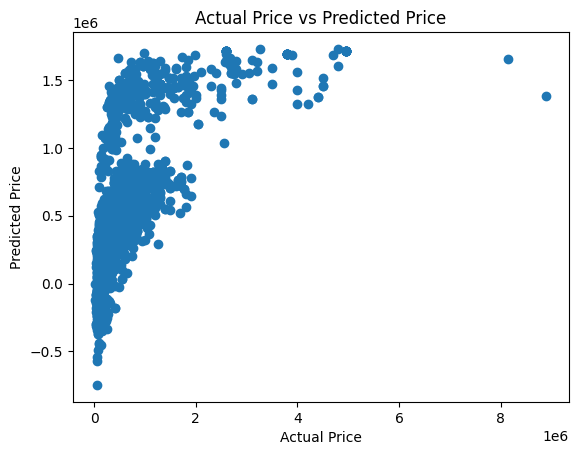

In [67]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [68]:
lasso_reg_model = Lasso()

In [69]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [70]:
training_data_prediction = lasso_reg_model.predict(X_train)

In [71]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print(" R squared error for lasso reg",error_score)

 R squared error for lasso reg 0.4430787587404139


In [72]:
test_data_prediction = lasso_reg_model.predict(X_test)

In [73]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(" R squared error for lasso reg",error_score)

 R squared error for lasso reg 0.5212906062492373


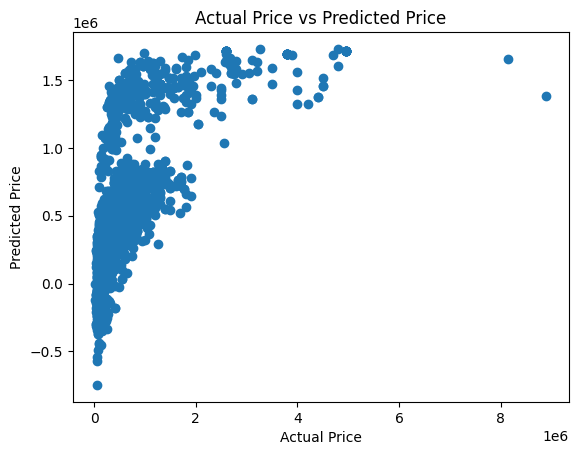

In [74]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()